<a href="https://colab.research.google.com/github/Ranyaa-11/Diamond-price-prediction-app/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.  **IMPORT LIBRARIES AND LOAD DATA**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from google.colab import files
uploaded=files.upload()


Saving diamonds.csv to diamonds.csv


In [ ]:
df=pd.read_csv("diamonds.csv")
df.head(100)

,Unnamed: 0,carat,quality,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,97,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,98,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
98,99,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56





2.   **EXPLORATORY DATA ANALYSIS(EDA)**



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   quality     53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
quality,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.drop(columns=['Unnamed: 0'])

,carat,quality,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df['quality'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

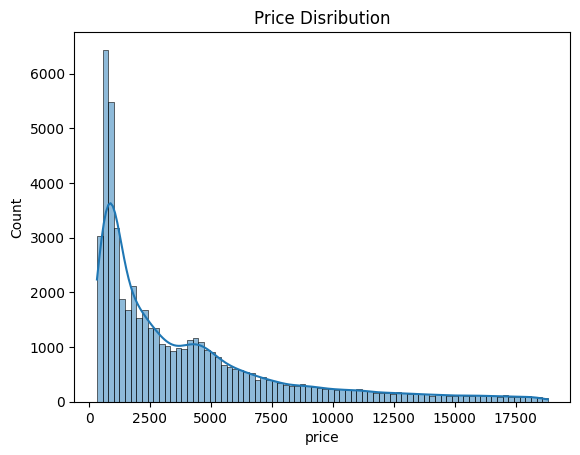

In [ ]:
#histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'],kde=True)
plt.title("Price Disribution")
plt.show()

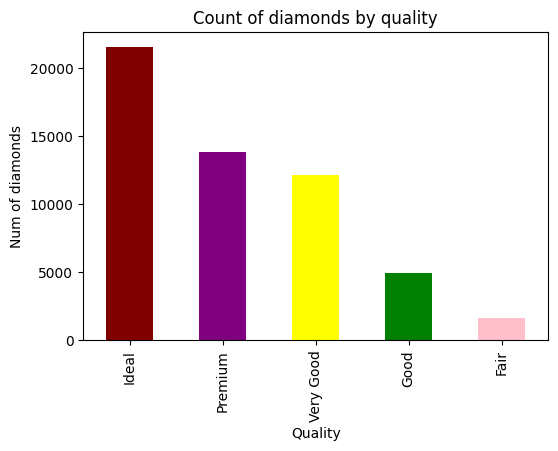

In [ ]:
#bar graph ,number of diamonds which fall into each quality category
plt.figure(figsize=(6,4))
df['quality'].value_counts().plot(kind='bar', color=['maroon','purple','yellow','green','pink'])
plt.title("Count of diamonds by quality")
plt.xlabel("Quality")
plt.ylabel("Num of diamonds")
plt.show()

In [ ]:
#num of diamonds falling to each quality category
df['quality'].value_counts()


,count
quality,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


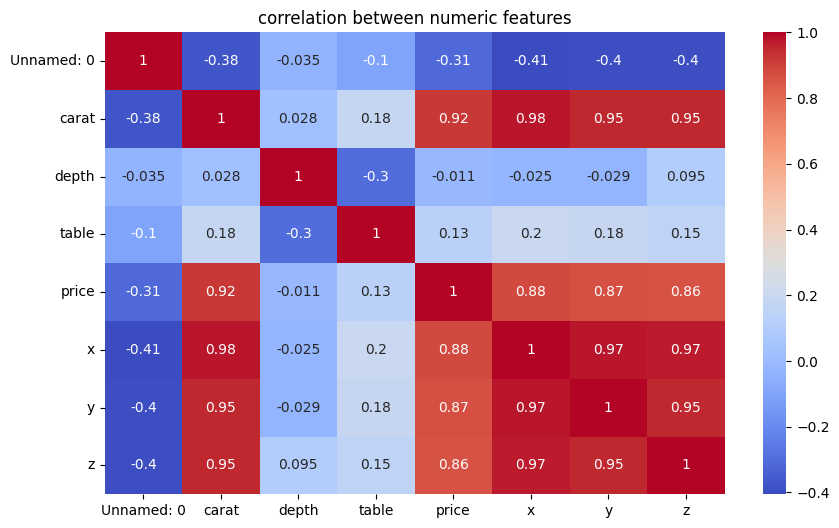

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm")
plt.title("correlation between numeric features")
plt.show()

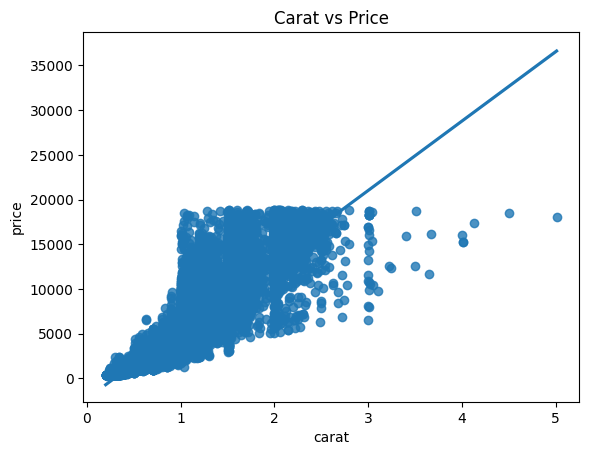

In [ ]:
sns.regplot(x='carat', y='price', data=df)
plt.title("Carat vs Price")
plt.show()




3.   **DATA PREPROCESSING**



In [ ]:
df['volume']=df['x']*df['y']*df['z']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
#label encoder
le_quality = LabelEncoder()
df["quality_encoded"] = le_quality.fit_transform(df["quality"])

# Features and labels
X = df[["carat","depth","table","x","y","z","quality_encoded"]]
y = df["price"]



In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
x=df[["carat","depth","table","x","y","z","quality_encoded"]]
y=df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print("Linear regression")
print("Train R²:", r2_score(y_train, lr_train_pred))
print("Test R²:", r2_score(y_test, lr_test_pred))
print("mean abs err:",mean_absolute_error(y_test,lr_pred))
print("mean sq err:",mean_squared_error(y_test,lr_pred))
print("R sq score:",r2_score(y_test,lr_pred))





Linear regression
Train R²: 0.8596947682165763
Test R²: 0.8594332215117001
mean abs err: 887.5222212950584
mean sq err: 2234564.979607264
R sq score: 0.8594332215117001


In [ ]:
#decision tree regressor
dt =DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_train_pred=dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
print("\n Decision tree regression ")
print(" Train R sq score:",r2_score(y_train,dt_train_pred))
print("Test R sq score:",r2_score(y_test,dt_test_pred))
print("mean abs err:",mean_absolute_error(y_test,dt_test_pred))
print("mean sq err:",mean_squared_error(y_test,dt_test_pred))



 Decision tree regression 
 Train R sq score: 0.9991284003958553
Test R sq score: 0.7888307404991446
mean abs err: 1008.4440952910641
mean sq err: 3356920.0142798065


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_train_pred=rf.predict(X_train)
print("\n Random forest ")
print(" Train R sq score:",r2_score(y_train,rf_train_pred))
print("Test R sq score:",r2_score(y_test,rf_pred))
print("mean abs err:",mean_absolute_error(y_test,rf_pred))
print("mean sq err:",mean_squared_error(y_test,rf_pred))



 Random forest 
 Train R sq score: 0.9827714769244408
Test R sq score: 0.8811033075195774
mean abs err: 785.8591116922051
mean sq err: 1890079.4915065998


In [ ]:
#  new diamond features
new_data = pd.DataFrame({
    "carat": [1.2, 0.5],
    "depth": [61.5, 62.2],
    "table": [55, 57],
    "x": [6.8, 5.2],
    "y": [6.9, 5.1],
    "z": [4.2, 3.2],
    "quality_encoded": [2, 1]
})

pred_prices = rf.predict(new_data)
print("Predicted Prices:", pred_prices)


Predicted Prices: [10934.          1579.26166667]


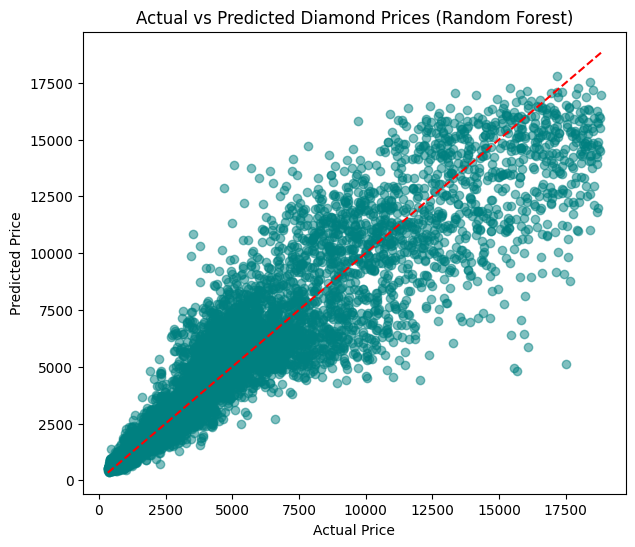

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Actual vs Predicted (Random Forest)
plt.figure(figsize=(7,6))
plt.scatter(y_test, rf_pred, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (Random Forest)")
plt.show()







In [ ]:
results = pd.DataFrame({
    "Actual Price": y_test.values,
    "LR Prediction": lr_pred,
    "DT Prediction": dt_pred,
    "RF Prediction": rf_pred
})


results["LR Error"] = abs(results["Actual Price"] - results["LR Prediction"])
results["DT Error"] = abs(results["Actual Price"] - results["DT Prediction"])
results["RF Error"] = abs(results["Actual Price"] - results["RF Prediction"])


print(results.head(10))



   Actual Price  LR Prediction  DT Prediction  RF Prediction     LR Error  \
0           559     161.229159          678.0     566.870000   397.770841   
1          2201    2466.075709         1442.0    1631.810000   265.075709   
2          1238    1019.107493          971.0    1213.911000   218.892507   
3          1304    1259.504022          852.0    1032.346667    44.495978   
4          6901   10004.940573        12646.0   11026.380000  3103.940573   
5          3011    5514.423028         4150.0    4210.150000  2503.423028   
6          1765    1893.684011         1632.0    1789.840000   128.684011   
7          1679    1716.102767         2275.0    1854.015667    37.102767   
8          2102    2424.914026         2270.0    2043.690000   322.914026   
9          4789    6588.486895        10850.0    8441.850000  1799.486895   

   DT Error     RF Error  
0     119.0     7.870000  
1     759.0   569.190000  
2     267.0    24.089000  
3     452.0   271.653333  
4    5745.0  4125